<a href="https://colab.research.google.com/github/Hamdan070905/AI-ML-Task7/blob/main/AI_ML_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [9]:
df = pd.read_csv("Breast Cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'unnamed' in col.lower()], inplace=True)

if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # M=1, B=0

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print(X.shape, y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(569, 30) (569,)
(569, 30)
(455, 30) (114, 30) (455,) (114,)


In [27]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
print(svm_linear.score(X_test, y_test))
print(classification_report(y_test, svm_linear.predict(X_test)))
print(confusion_matrix(y_test, svm_linear.predict(X_test)))

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
print(svm_rbf.score(X_test, y_test))
print(classification_report(y_test, svm_rbf.predict(X_test)))
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))

0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

[[68  3]
 [ 2 41]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[70  1]
 [ 2 41]]


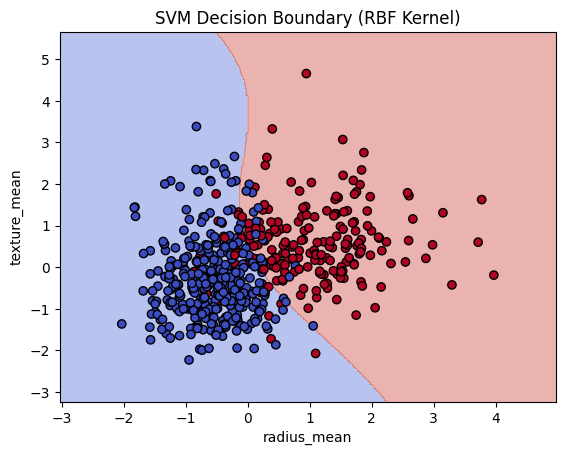

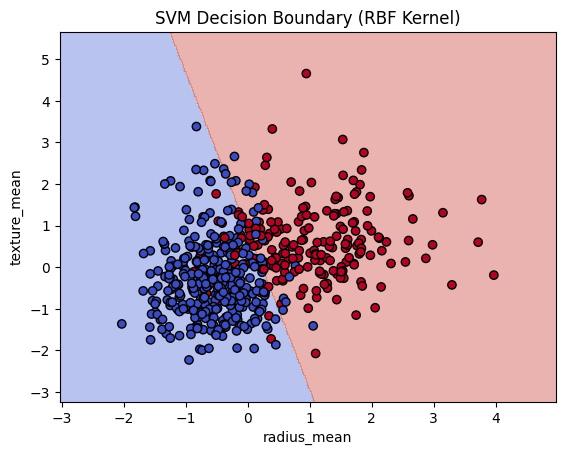

In [33]:
X_vis = df[['radius_mean', 'texture_mean']]
y_vis = df['diagnosis']
X_vis_scaled = scaler.fit_transform(X_vis)
y_vis = LabelEncoder().fit_transform(y_vis)

svm_2d = SVC(kernel='rbf', C=1, gamma=0.1)
svm_2d.fit(X_vis_scaled, y_vis)

svm_linear_2d = SVC(kernel='linear', C=1)
svm_linear_2d.fit(X_vis_scaled, y_vis)




def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")
    plt.title("SVM Decision Boundary (RBF Kernel)")
    plt.show()

plot_decision_boundary(X_vis_scaled, y_vis, svm_2d)

plot_decision_boundary(X_vis_scaled, y_vis, svm_linear_2d)




In [36]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


In [35]:
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy: 97.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


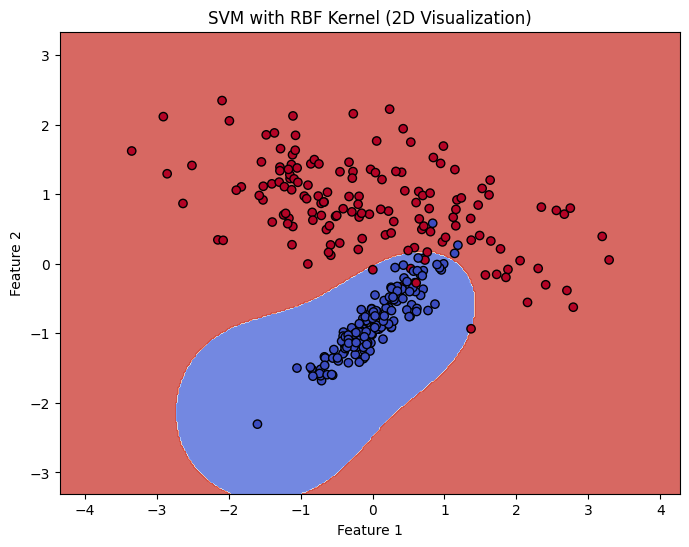

In [37]:
X_vis, y_vis = make_classification(
    n_samples=300, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1, random_state=42
)

scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

svc_vis = SVC(kernel='rbf', C=1, gamma=0.5)
svc_vis.fit(X_vis, y_vis)

def plot_decision_boundary(X, y, model, title):
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_vis, y_vis, svc_vis, "SVM with RBF Kernel (2D Visualization)")